In [1]:
from model import *
from data import *

In [2]:
labels = ['background','stage 1','stage 2','stage 3','border']

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/cells/all/train','input','masks',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_cells.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=100,epochs=5,callbacks=[model_checkpoint])

### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [4]:
testGene = testGenerator("data/cells/all/test")
model = unet()
model.load_weights("unet_cells.hdf5")
results = model.predict_generator(testGene,10,verbose=1)
saveResult("data/cells/all/test/result",results)

10/10 [==============================] - 0s 29ms/step


/home/mzouink/Desktop/DL/unet/data.py:127: UserWarning: data/cells/all/test/result/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/mzouink/Desktop/DL/unet/data.py:127: UserWarning: data/cells/all/test/result/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/mzouink/Desktop/DL/unet/data.py:127: UserWarning: data/cells/all/test/result/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/mzouink/Desktop/DL/unet/data.py:127: UserWarning: data/cells/all/test/result/3_predict.png is 

In [5]:
import matplotlib.pyplot as plt

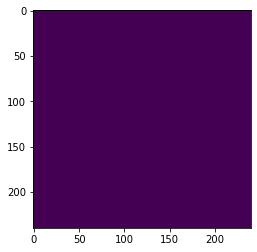

In [7]:
plt.imshow(results[1,:,:,0])

In [10]:
results[1,:,:,0].max()

0.48757693